##Data Cleaning and Explonatory Data Analysis

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
movoto=pd.read_csv('movoto.csv') # reading file "movoto.csv"
!pip install lazypredict
!pip install dmba

     |████████████████████████████████| 11.8MB 7.5MB/s 


In [ ]:
movoto.head(1) # to display few records to analyse the data and to understand which columns will be useful for further anlaysis

,Unnamed: 0,closePrice,daysOnMovoto,id,tnImgPath,listDate,listingAgent,listPrice,lotSize,sqftTotal,mlsDbNumber,mlsNumber,bath,bed,openHouses,officeListName,photoCount,propertyType,propertyTypeDisplayName,yearBuilt,zipCode,path,status,houseRealStatus,priceChange,propertyId,visibility,soldDate,createdAt,imageDownloaderStatus,onMarketDateTime,virtualTourLink,nhsDetails,isNHS,isSold,listingByMovoto,priceRaw,isVideoTour,is3DTour,videoTourLink,mls.dateHidden,mls.id,geo.state,geo.city,geo.lat,geo.lng,geo.zipcode,geo.subPremise,geo.address,virtualLink,address,nhsBuilderName,nhsBuilderId,nhsListingType,nhsMarketName,nhsMarketId,nhsPlanName,nhsCommunityName,nhsCommunityId,longitude,latitude,activeUnderContract
0,0,NaN,0,09821e54-78cd-4a5e-8dfc-59f0d8355131,https://pi.movoto.com/p/12/40948159_0_77ajuZ_p...,2021-05-02 00:00:00,Carlos Otazu,1150000,1750.0,1064.0,12,40948159,1.0,3.0,[],Bay Port Group Real Estate Inc.,1,SINGLE_FAMILY_HOUSE,Detached,1952.0,94110,san-francisco-ca/639-banks-st-san-francisco-ca...,Active,ACTIVE,NaN,7a66e4b8-6ada-4a45-b506-97cbfd4ba495,NO_RESTRICTION,NaN,2021-05-02 23:26:22,7,2021-05-02 00:00:00,NaN,NaN,False,False,False,1150000,False,False,NaN,NaN,12,CA,San Francisco,37.735342,-122.412869,94110,NaN,639 Banks St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movoto.shape

(1990, 62)

In [ ]:
movoto.columns # to display all columns

Index(['Unnamed: 0', 'closePrice', 'daysOnMovoto', 'id', 'tnImgPath',
       'listDate', 'listingAgent', 'listPrice', 'lotSize', 'sqftTotal',
       'mlsDbNumber', 'mlsNumber', 'bath', 'bed', 'openHouses',
       'officeListName', 'photoCount', 'propertyType',
       'propertyTypeDisplayName', 'yearBuilt', 'zipCode', 'path', 'status',
       'houseRealStatus', 'priceChange', 'propertyId', 'visibility',
       'soldDate', 'createdAt', 'imageDownloaderStatus', 'onMarketDateTime',
       'virtualTourLink', 'nhsDetails', 'isNHS', 'isSold', 'listingByMovoto',
       'priceRaw', 'isVideoTour', 'is3DTour', 'videoTourLink',
       'mls.dateHidden', 'mls.id', 'geo.state', 'geo.city', 'geo.lat',
       'geo.lng', 'geo.zipcode', 'geo.subPremise', 'geo.address',
       'virtualLink', 'address', 'nhsBuilderName', 'nhsBuilderId',
       'nhsListingType', 'nhsMarketName', 'nhsMarketId', 'nhsPlanName',
       'nhsCommunityName', 'nhsCommunityId', 'longitude', 'latitude',
       'activeUnderContract'],

In [ ]:
movoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1990 non-null   int64  
 1   closePrice               0 non-null      float64
 2   daysOnMovoto             1990 non-null   int64  
 3   id                       1990 non-null   object 
 4   tnImgPath                1990 non-null   object 
 5   listDate                 1963 non-null   object 
 6   listingAgent             1985 non-null   object 
 7   listPrice                1990 non-null   int64  
 8   lotSize                  1912 non-null   float64
 9   sqftTotal                1957 non-null   float64
 10  mlsDbNumber              1990 non-null   int64  
 11  mlsNumber                1990 non-null   object 
 12  bath                     1811 non-null   float64
 13  bed                      1838 non-null   float64
 14  openHouses              

In [ ]:
movoto.drop(movoto.columns[[0,1,4,10,14,16,18,27,29,31,32,37,38,39,40,41,47]], axis=1, inplace=True)

In [ ]:
movoto_df=movoto.drop(labels=['priceChange','id','propertyId','visibility','isNHS','isSold','listingByMovoto','virtualLink', 'address', 'nhsBuilderName', 'nhsBuilderId',
       'nhsListingType', 'nhsMarketName', 'nhsMarketId', 'nhsPlanName',
       'nhsCommunityName', 'nhsCommunityId', 'longitude', 'latitude',
       'activeUnderContract'], axis=1)

## Dropping the missing or null values.


In [ ]:
movoto_df.isna().sum() # to display null values in the columns

daysOnMovoto          0
listDate             27
listingAgent          5
listPrice             0
lotSize              78
sqftTotal            33
mlsNumber             0
bath                179
bed                 152
officeListName       21
propertyType          0
yearBuilt           210
zipCode               0
path                  0
status                0
houseRealStatus       0
createdAt             0
onMarketDateTime      0
priceRaw              0
geo.state             0
geo.city              0
geo.lat               0
geo.lng               0
geo.zipcode           0
geo.address           0
dtype: int64

In [ ]:
movoto_df.dropna(axis=0,inplace=True) # to delete rows with null values 

In [ ]:
movoto_df.shape

(1529, 25)

##Dropping the duplicate rows.

In [ ]:
movoto_df.duplicated().value_counts() # To check if there are any duplicated values.There are no duplicate records

False    1529
dtype: int64

##Converting the columns to correct data types

In [ ]:
# converting all float values to int values to check if there are any outliers
float_columns = movoto_df.select_dtypes(include=['float64'])
for col in float_columns:
  movoto_df[col] = movoto_df[col].astype('int64')

In [ ]:
movoto_df.dtypes

daysOnMovoto         int64
listDate            object
listingAgent        object
listPrice            int64
lotSize              int64
sqftTotal            int64
mlsNumber           object
bath                 int64
bed                  int64
officeListName      object
propertyType        object
yearBuilt            int64
zipCode              int64
path                object
status              object
houseRealStatus     object
createdAt           object
onMarketDateTime    object
priceRaw             int64
geo.state           object
geo.city            object
geo.lat              int64
geo.lng              int64
geo.zipcode          int64
geo.address         object
dtype: object

##Outliers

In [ ]:
outlier_cols = [i for i in list(movoto_df.columns) if movoto_df[i].dtype!=object]# to check outliers for only int and float columns

In [ ]:
outlier_cols


['daysOnMovoto',
 'listPrice',
 'lotSize',
 'sqftTotal',
 'bath',
 'bed',
 'yearBuilt',
 'zipCode',
 'priceRaw',
 'geo.lat',
 'geo.lng',
 'geo.zipcode']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
def removeOutliers(df1, outlierConstant):
  for col in outlier_cols[:-3]:
    upper_quartile = df1[col].quantile(0.75)
    lower_quartile = df1[col].quantile(0.25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = [math.ceil(lower_quartile - IQR), math.ceil(upper_quartile + IQR)]
    print("The Lower and Upper range of ",col,quartileSet)
    df2 = df1.loc[(df1[col] > quartileSet[0]) & (df1[col] < quartileSet[1])]
    df1 =df2
    
  return df2 

In [ ]:
df = removeOutliers(movoto_df,1.5)

The Lower and Upper range of  daysOnMovoto [-62, 146]
The Lower and Upper range of  listPrice [-769000, 3815000]
The Lower and Upper range of  lotSize [-3641, 10577]
The Lower and Upper range of  sqftTotal [-888, 3924]
The Lower and Upper range of  bath [-2, 6]
The Lower and Upper range of  bed [1, 5]
The Lower and Upper range of  yearBuilt [1797, 2097]
The Lower and Upper range of  zipCode [94091, 94143]
The Lower and Upper range of  priceRaw [-52500, 3007500]


In [ ]:
df.shape

(691, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 1915
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   daysOnMovoto      691 non-null    int64 
 1   listDate          691 non-null    object
 2   listingAgent      691 non-null    object
 3   listPrice         691 non-null    int64 
 4   lotSize           691 non-null    int64 
 5   sqftTotal         691 non-null    int64 
 6   mlsNumber         691 non-null    object
 7   bath              691 non-null    int64 
 8   bed               691 non-null    int64 
 9   officeListName    691 non-null    object
 10  propertyType      691 non-null    object
 11  yearBuilt         691 non-null    int64 
 12  zipCode           691 non-null    int64 
 13  path              691 non-null    object
 14  status            691 non-null    object
 15  houseRealStatus   691 non-null    object
 16  createdAt         691 non-null    object
 17  onMarketDateTim

In [ ]:
df_filtered = df[(df['lotSize'] == 0) & (df['sqftTotal'] == 0)]

In [ ]:
df_filtered.head()

,daysOnMovoto,listDate,listingAgent,listPrice,lotSize,sqftTotal,mlsNumber,bath,bed,officeListName,propertyType,yearBuilt,zipCode,path,status,houseRealStatus,createdAt,onMarketDateTime,priceRaw,geo.state,geo.city,geo.lat,geo.lng,geo.zipcode,geo.address
28,2,2021-04-30 00:00:00,Todd Wiley,2500000,0,0,421544291,1,3,Compass,CONDO,1910,94114,san-francisco-ca/210-dorland-st-san-francisco-...,Active,ACTIVE,2021-05-01 00:06:20,2021-04-30 00:00:00,2500000,CA,San Francisco,37,-122,94114,210 Dorland St
41,2,2021-04-30 00:00:00,Loring Aguillon-Racine,1928888,0,0,421543223,2,3,"JS Sullivan Sales and Marketing, Inc.",CONDO,2021,94102,san-francisco-ca/555-golden-gate-ave-apt-ph11-...,Active,ACTIVE,2021-04-30 17:51:47,2021-04-30 00:00:00,1928888,CA,San Francisco,37,-122,94102,555 Golden Gate Ave #PH11
104,3,2020-12-07 00:00:00,Michelle Long,1495000,0,0,421543081,1,2,Compass,CONDO,1909,94117,san-francisco-ca/1156-stanyan-st-san-francisco...,Active,ACTIVE,2021-04-29 07:21:14,2020-12-07 00:00:00,1495000,CA,San Francisco,37,-122,94117,1156 Stanyan St
243,9,2021-04-22 00:00:00,Loring Aguillon-Racine,2698000,0,0,421541549,3,3,"JS Sullivan Sales and Marketing, Inc.",CONDO,2020,94123,san-francisco-ca/2448-lombard-st-apt-ph4-san-f...,Active,ACTIVE,2021-04-23 04:51:16,2021-04-22 00:00:00,2698000,CA,San Francisco,37,-122,94123,2448 Lombard St #PH4
269,10,2021-04-21 00:00:00,Frank Nolan,1399000,0,0,421541213,2,2,Vanguard Properties,CONDO,2021,94123,san-francisco-ca/2148-union-st-apt-2-san-franc...,Active,ACTIVE,2021-04-22 19:06:54,2021-04-21 00:00:00,1399000,CA,San Francisco,37,-122,94123,2148 Union St #2


In [ ]:
df.drop(df[(df['lotSize'] == 0) | (df['sqftTotal'] == 0)].index, inplace=True)

In [ ]:
df.shape

(504, 25)

In [ ]:
df.head()

,daysOnMovoto,listDate,listingAgent,listPrice,lotSize,sqftTotal,mlsNumber,bath,bed,officeListName,propertyType,yearBuilt,zipCode,path,status,houseRealStatus,createdAt,onMarketDateTime,priceRaw,geo.state,geo.city,geo.lat,geo.lng,geo.zipcode,geo.address
0,0,2021-05-02 00:00:00,Carlos Otazu,1150000,1750,1064,40948159,1,3,Bay Port Group Real Estate Inc.,SINGLE_FAMILY_HOUSE,1952,94110,san-francisco-ca/639-banks-st-san-francisco-ca...,Active,ACTIVE,2021-05-02 23:26:22,2021-05-02 00:00:00,1150000,CA,San Francisco,37,-122,94110,639 Banks St
7,0,2021-05-01 00:00:00,Deborah Nguyen,1395000,3371,1868,421544595,2,3,Compass,SINGLE_FAMILY_HOUSE,1956,94131,san-francisco-ca/187-skyview-way-san-francisco...,Active,ACTIVE,2021-05-02 04:01:19,2021-05-01 00:00:00,1395000,CA,San Francisco,37,-122,94131,187 Skyview Way
9,1,2021-04-29 00:00:00,Eva Stoyanov,1899000,2375,2533,421543168,3,3,Compass SF,SINGLE_FAMILY_HOUSE,1913,94122,san-francisco-ca/1286-26th-ave-san-francisco-c...,Active,ACTIVE,2021-05-01 21:26:13,2021-04-29 00:00:00,1899000,CA,San Francisco,37,-122,94122,1286 26th Ave
10,1,2021-03-26 00:00:00,Farah Abed,1395000,1920,2394,421543567,1,3,Vanguard Properties,MULTI_FAMILY,1907,94110,san-francisco-ca/1270-hampshire-st-apt-3-san-f...,Active,ACTIVE,2021-05-01 20:46:28,2021-03-26 00:00:00,1395000,CA,San Francisco,37,-122,94110,1270 Hampshire St #3
15,1,2021-03-01 00:00:00,Betsy Linder,2300000,6428,1850,421542530,2,2,Compass,CONDO,1913,94118,san-francisco-ca/3233-jackson-st-3-san-francis...,Active,ACTIVE,2021-05-01 17:56:31,2021-03-01 00:00:00,2300000,CA,San Francisco,37,-122,94118,3233 Jackson St #3


#Visuzalization

In [ ]:
df.drop(labels=['mlsNumber','geo.zipcode','createdAt','onMarketDateTime','priceRaw'], axis=1,inplace=True)

In [ ]:
df.to_csv('cleaneddata.csv',sep=',')

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (504, 21)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  2
    21 Predictors classified...
        This does not include the Target column(s)
        8 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 36


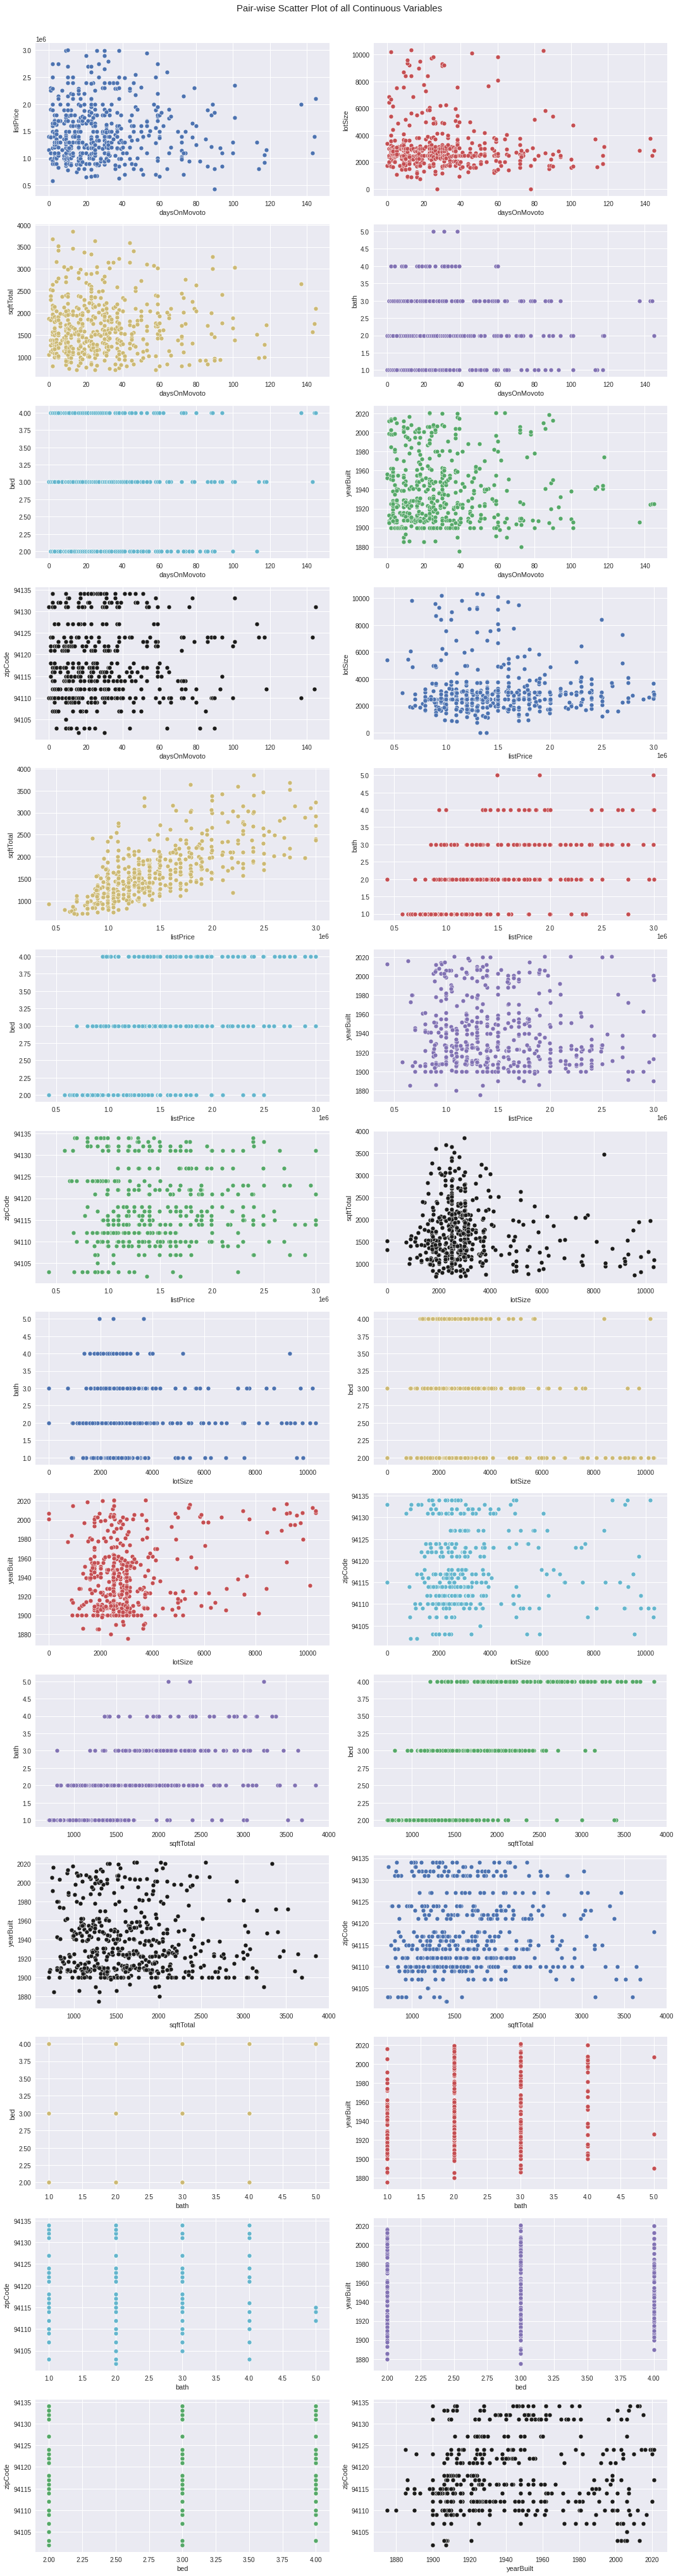

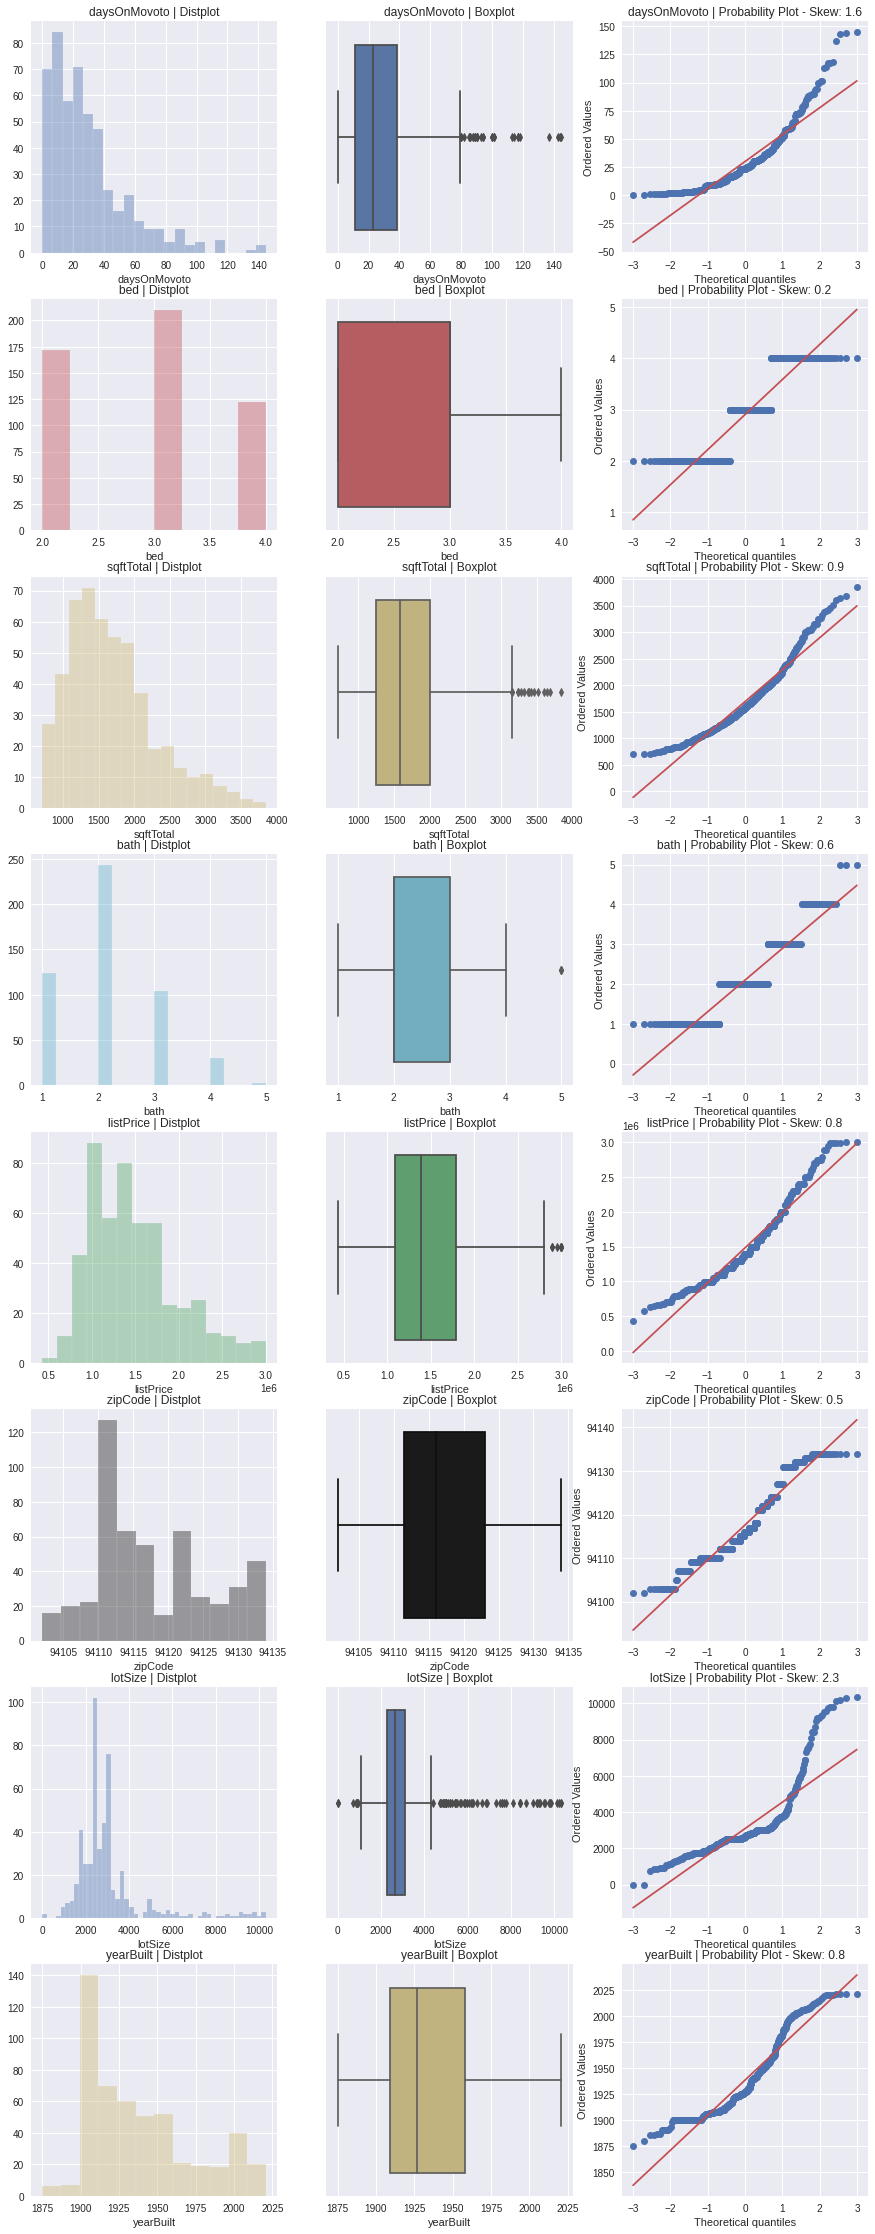

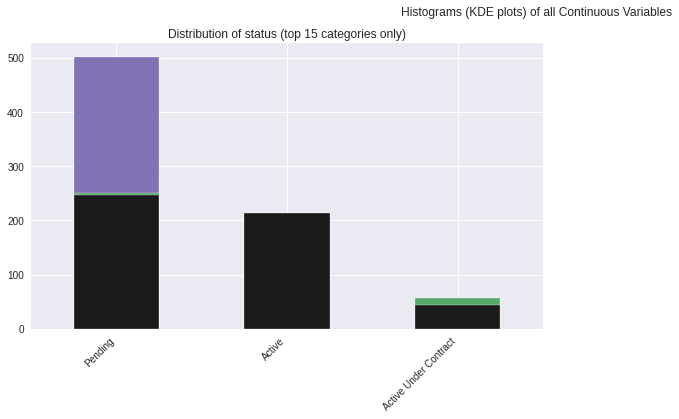

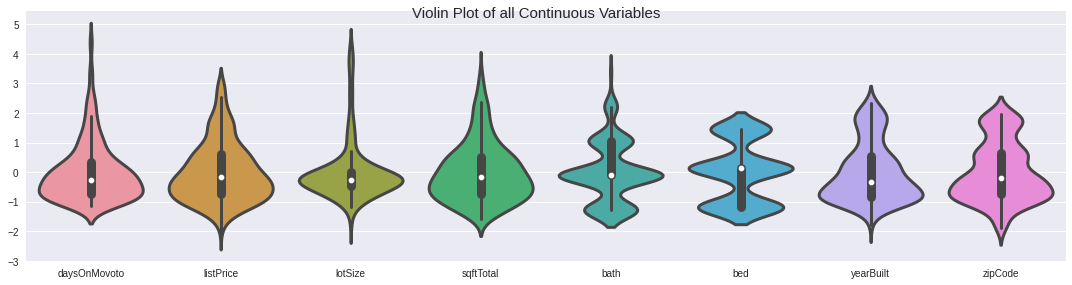

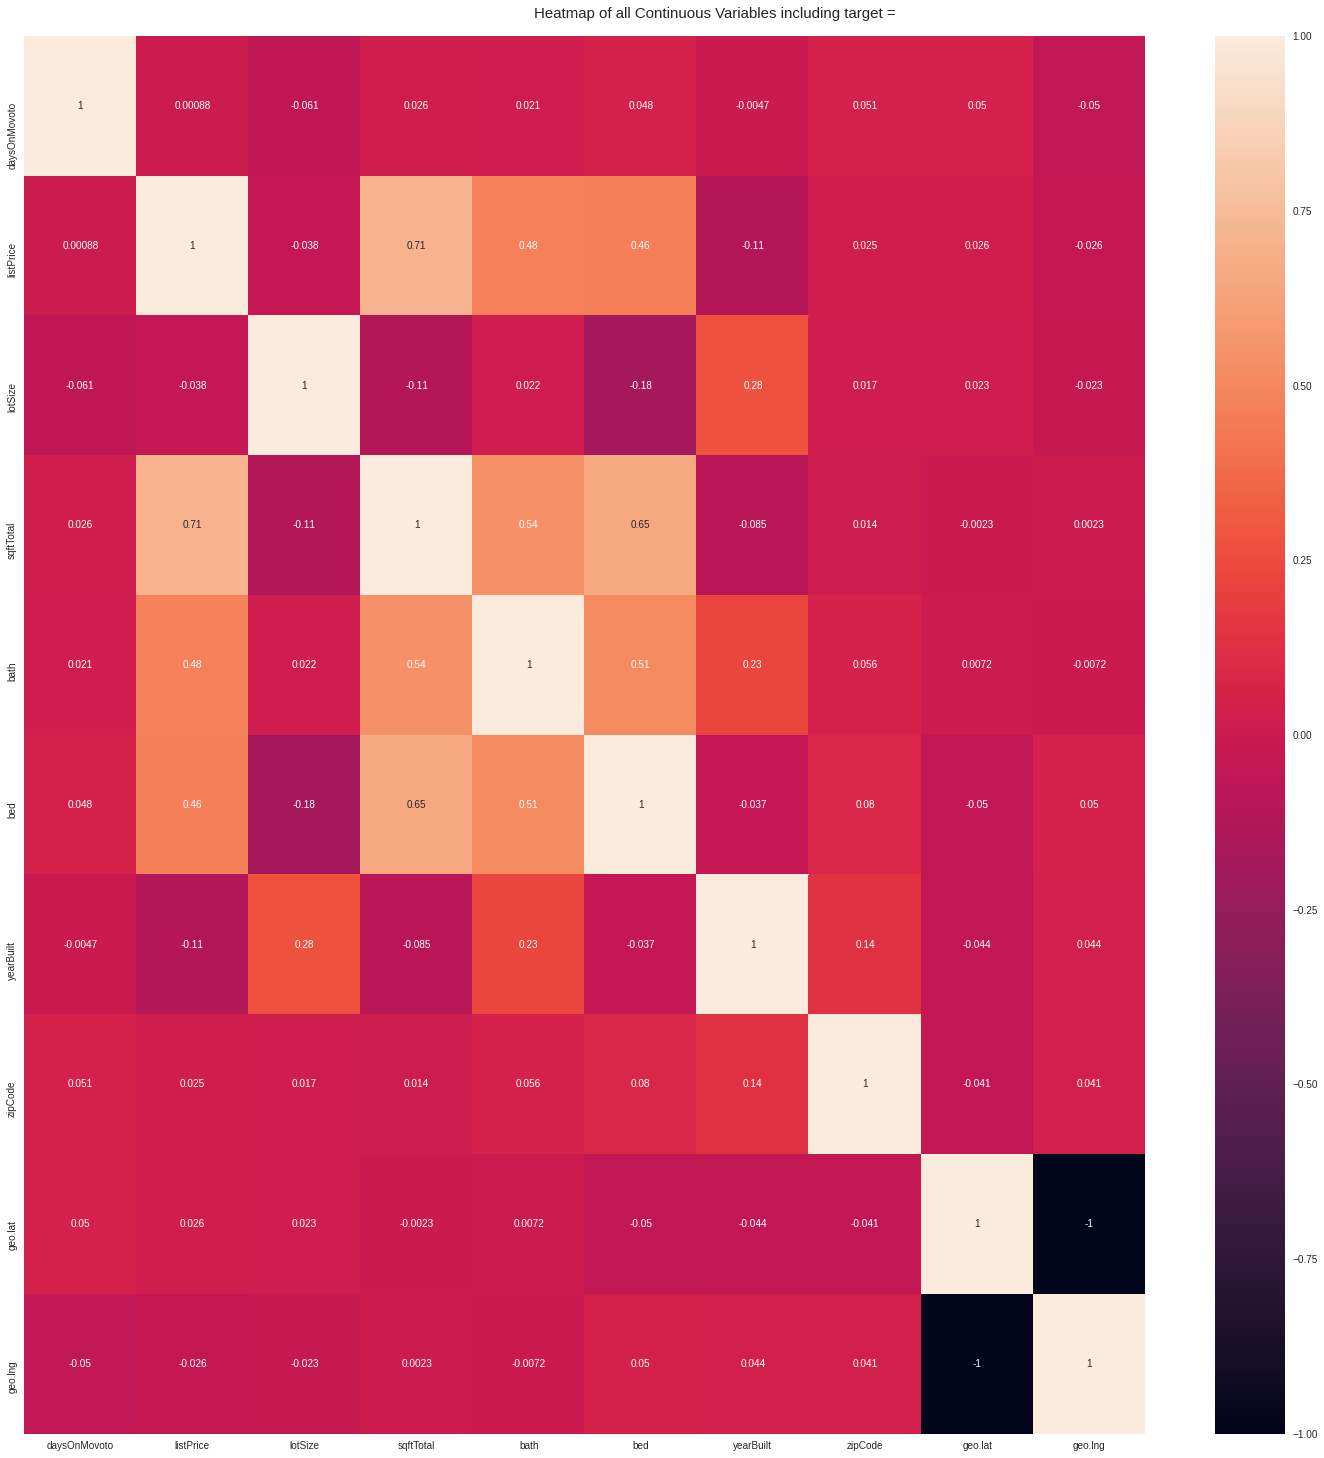

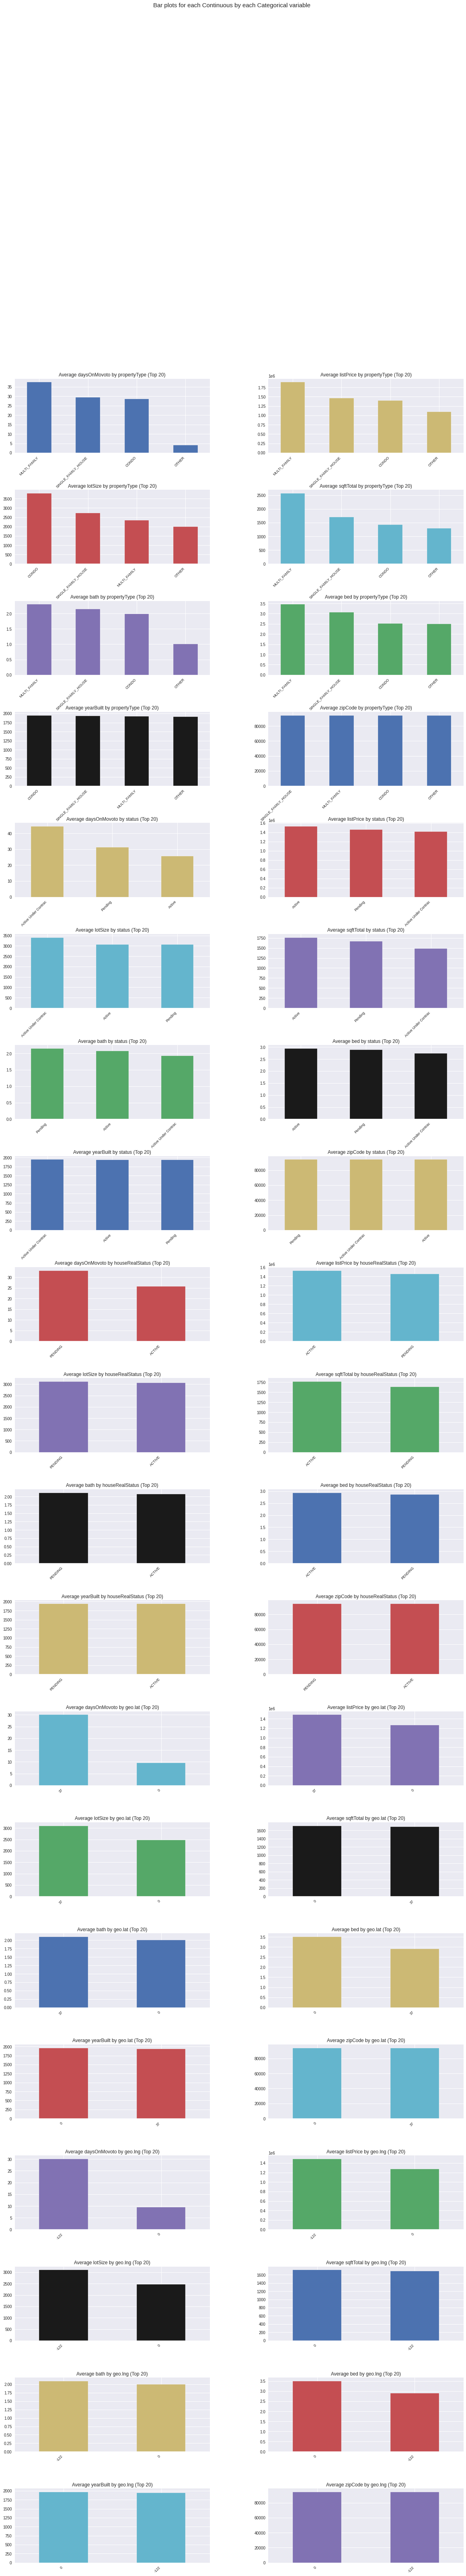

Time to run AutoViz (in seconds) = 25.223

 ###################### VISUALIZATION Completed ########################


In [ ]:
#All visualization in one place with AutoViz

filename="cleaneddata.csv"
sep =','
dft =AV.AutoViz(
    filename,
    sep=',',
    depVar='',
    dfte=None,
    header=0,
    verbose=0,
    lowess =False,
    chart_format="syg",
    max_rows_analyzed =150000,
    max_cols_analyzed=30,
)

daysOnMovoto


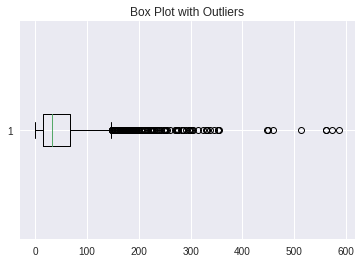

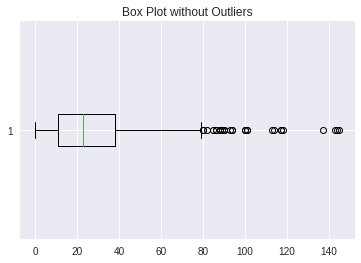

listPrice


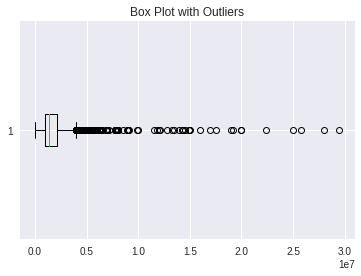

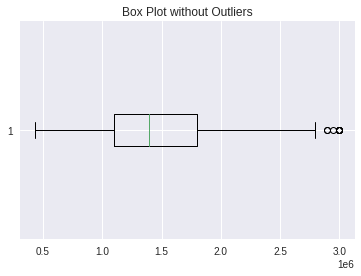

lotSize


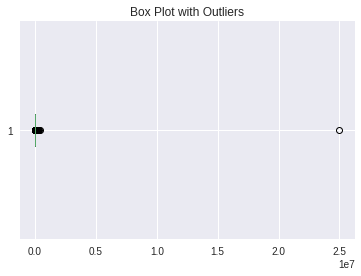

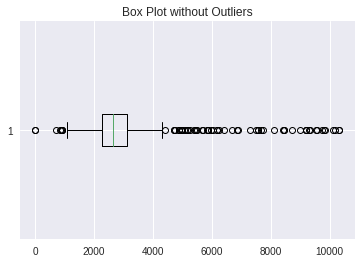

sqftTotal


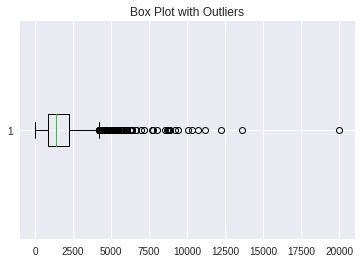

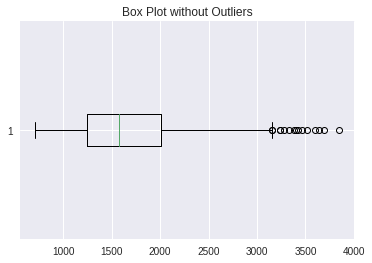

bath


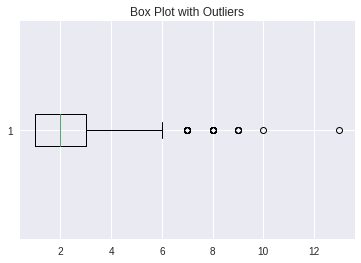

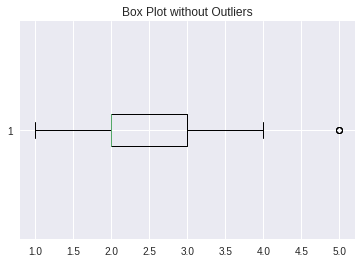

bed


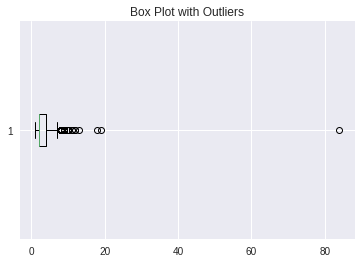

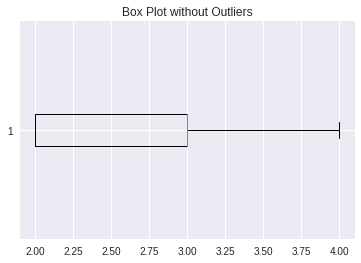

yearBuilt


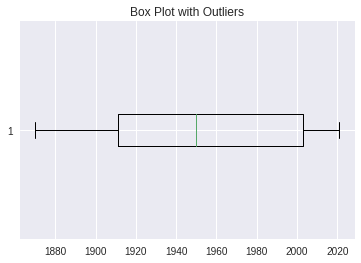

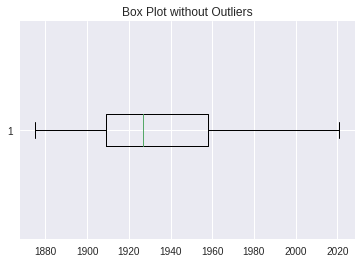

zipCode


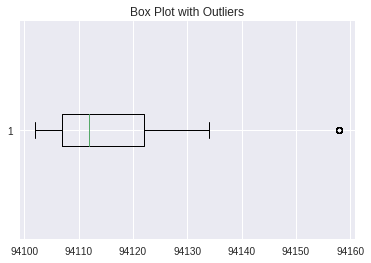

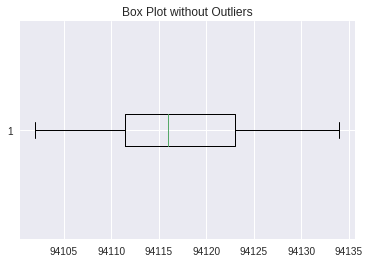

In [ ]:
for col in outlier_cols[:-4]:
  fig1, ax1 = plt.subplots()
  print(col)
  ax1.set_title('Box Plot with Outliers')
  ax1.boxplot(movoto_df[col],vert=False)

  fig2, ax2 = plt.subplots()
  ax2.set_title('Box Plot without Outliers')
  ax2.boxplot(df[col],vert=False)

# If you do not want to show outliers, you can try the following:
# ax2.boxplot(new,vert=False,showfliers=False)  
  plt.show()

In [ ]:
 import math
 # creating new variable to find the price per sqft
 df['pricepersqft'] = df['listPrice']//df['sqftTotal']
 df['pricepersqft'] =  df['pricepersqft'].astype('int64')

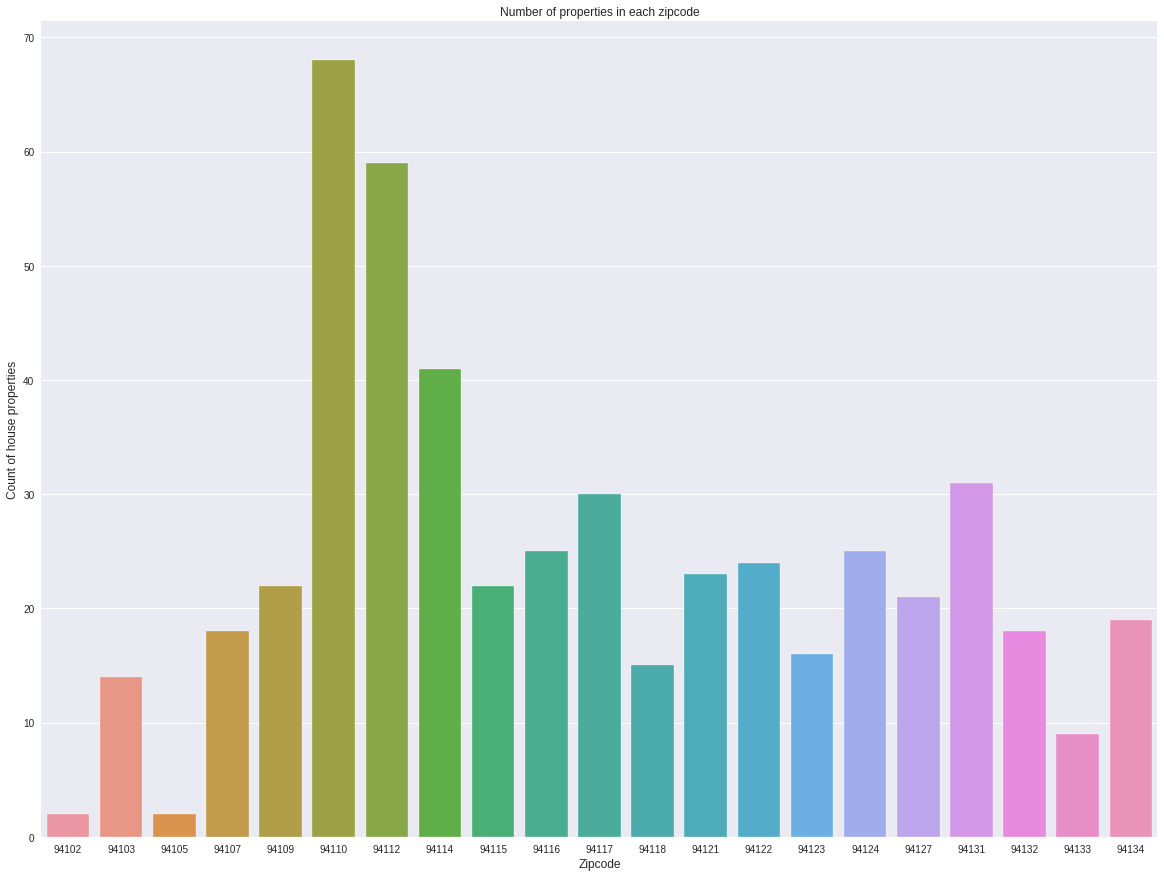

In [ ]:
plt.figure(figsize=(20,15))
ax=sns.barplot(df['zipCode'].value_counts().index, df['zipCode'].value_counts().values, alpha=1.0,)
plt.title('Number of properties in each zipcode')
plt.ylabel('Count of house properties', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)
plt.show()

##Which zip code has highest and lowest Avg Price per Square feet?

In [ ]:
df['yearBuilt'] =  df['yearBuilt'].astype('str') # converting year built to Categorical variable
df['zipCode'] =  df['zipCode'].astype('str') # converting zipcode to Categorical variable

df[['zipCode','pricepersqft']].groupby(['zipCode'],
as_index=False).mean().sort_values(by='pricepersqft', ascending=False)
# from below output we can understand the zip 94133 has highest avg price per sqft and 94124 has lowest average price per sqft

,zipCode,pricepersqft
19,94133,1164.777778
14,94123,1138.062500
0,94102,1092.500000
4,94109,1068.909091
7,94114,1029.463415
8,94115,1008.500000
10,94117,998.200000
17,94131,990.903226
11,94118,978.066667
3,94107,923.333333


## Top 5 Listing Agents who has highest sum of list price and Top 5 listing agents with lowest sum of listing price

In [ ]:
listagent_df = pd.DataFrame(df.pivot_table(index='listingAgent', values='listPrice', aggfunc='sum').to_records()).sort_values('listPrice',ascending=False)


In [ ]:
listagent_df.head(5)

,listingAgent,listPrice
267,Nina Hatvany,8740000
56,Chris Panou,8200000
128,Helena Zaludova,8110000
147,Jason Chan,7070000
188,Judson Gregory,7023000


In [ ]:
listagent_df.tail(5)

,listingAgent,listPrice
241,Mary Anne Villamil,678000
13,Allen Ho,668000
260,Mindy Tsoi,650000
318,Scott Rose,630000
266,Nicholas Spangler,431846


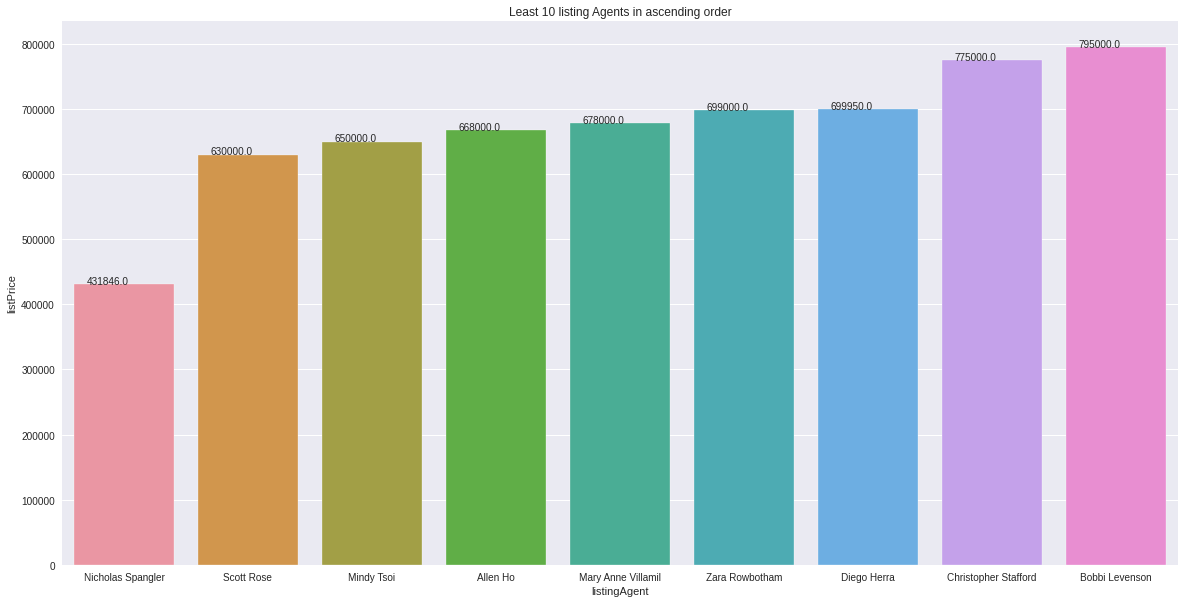

In [ ]:
plt.figure(figsize=(20,10))

ax=sns.barplot(listagent_df['listingAgent'].iloc[380:370:-1],listagent_df['listPrice'].iloc[380:370:-1])
plt.title("Least 10 listing Agents in ascending order")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+90))
plt.show()

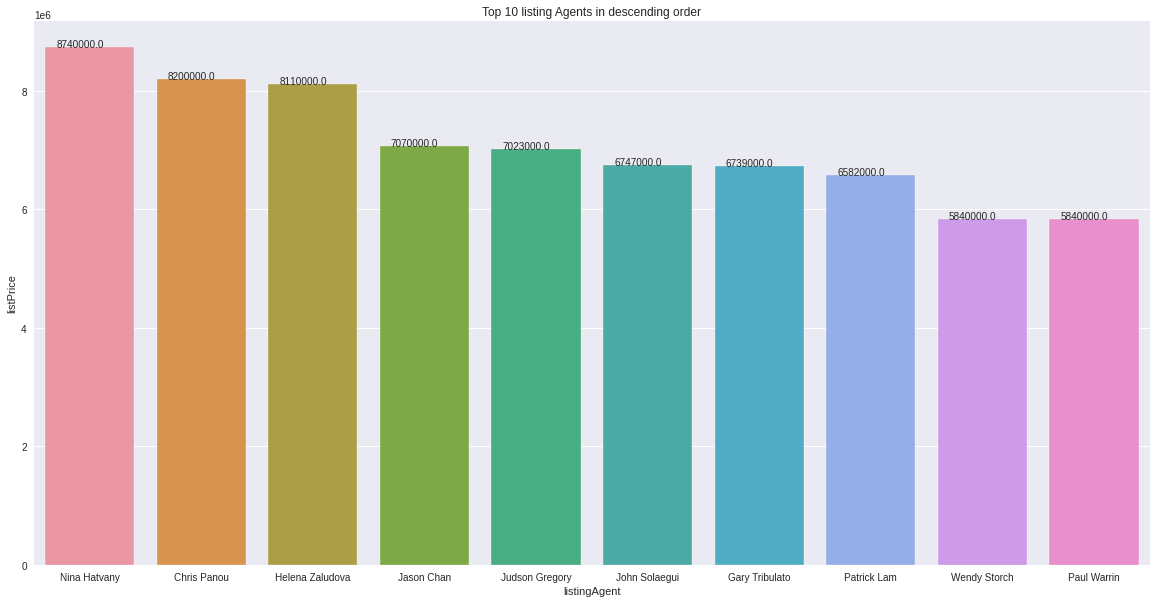

In [ ]:
plt.figure(figsize=(20,10))

ax=sns.barplot(listagent_df['listingAgent'].iloc[:10],listagent_df['listPrice'].iloc[:10])
plt.title("Top 10 listing Agents in descending order")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+90))
plt.show()

## Average price per Square feet for the property type

In [ ]:
prop_df = pd.DataFrame(df.pivot_table(index='propertyType', values='pricepersqft', aggfunc='mean').to_records()).sort_values('pricepersqft',ascending=False)

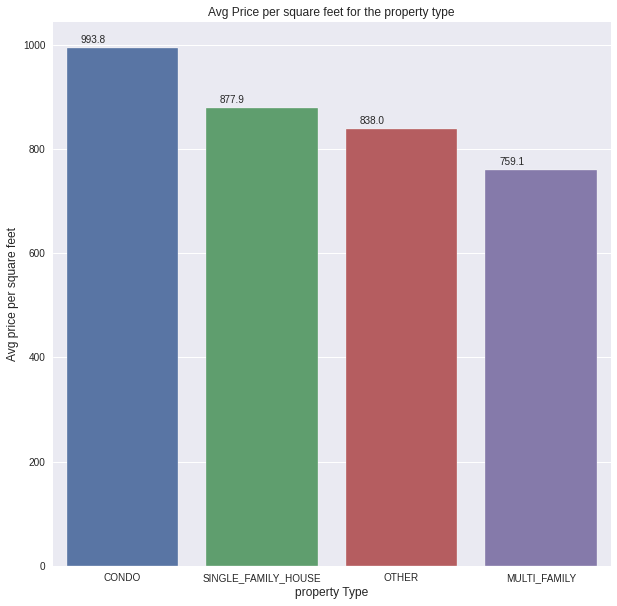

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=sns.barplot(prop_df['propertyType'],prop_df['pricepersqft'])
plt.title('Avg Price per square feet for the property type')
plt.ylabel('Avg price per square feet', fontsize=12)
plt.xlabel('property Type', fontsize=12)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

## Regression

In [ ]:
#delete unncessary columns which will not be useful for regression
df.drop(labels=['officeListName','yearBuilt','listingAgent','daysOnMovoto','listDate','path', 'geo.state', 'geo.city', 'geo.lat','geo.lng','geo.address', 'pricepersqft'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['listPrice', 'lotSize', 'sqftTotal', 'bath', 'bed', 'propertyType',
       'zipCode', 'status', 'houseRealStatus'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 1907
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   listPrice        504 non-null    int64 
 1   lotSize          504 non-null    int64 
 2   sqftTotal        504 non-null    int64 
 3   bath             504 non-null    int64 
 4   bed              504 non-null    int64 
 5   propertyType     504 non-null    object
 6   zipCode          504 non-null    object
 7   status           504 non-null    object
 8   houseRealStatus  504 non-null    object
dtypes: int64(5), object(4)
memory usage: 39.4+ KB


In [ ]:
numeric_col = [i for i in df.columns if df[i].dtype!='object']
categorical_col = [i for i in df.columns if df[i].dtype=='object']

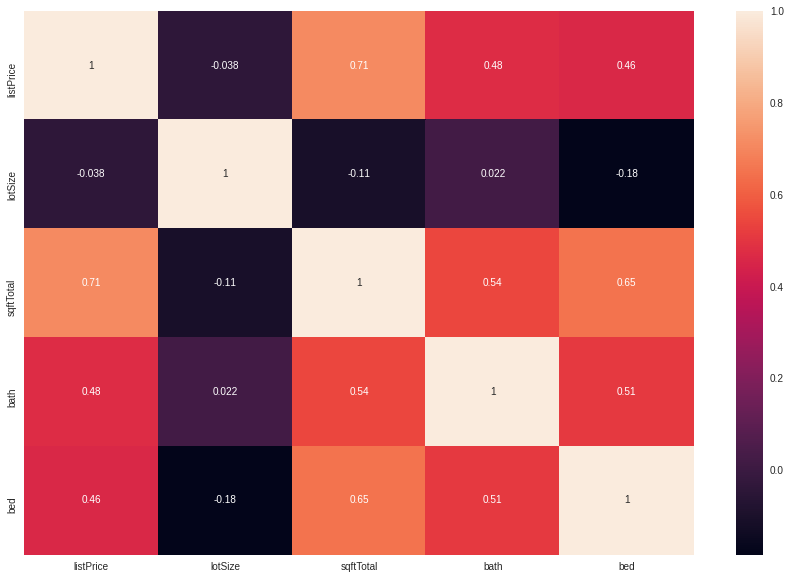

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True) # list price is correlated wih bed, bath and square feet variables

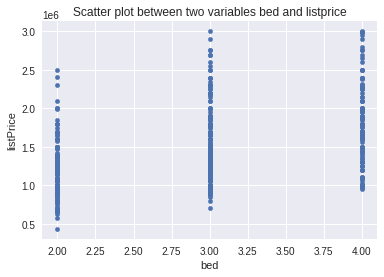

In [ ]:
dataFrame = pd.DataFrame(data=df, columns=['bed','listPrice']);

 # Draw a scatter plot

dataFrame.plot.scatter(x='bed', y='listPrice', title= "Scatter plot between two variables bed and listprice");

plt.show(block=True);

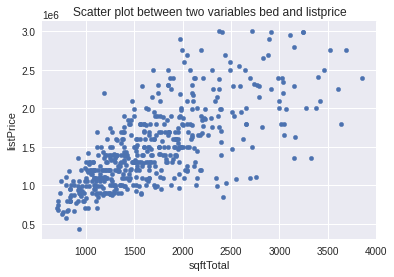

In [ ]:
dataFrame = pd.DataFrame(data=df, columns=['sqftTotal','listPrice']);

 # Draw a scatter plot

dataFrame.plot.scatter(x='sqftTotal', y='listPrice', title= "Scatter plot between two variables bed and listprice");

plt.show(block=True);

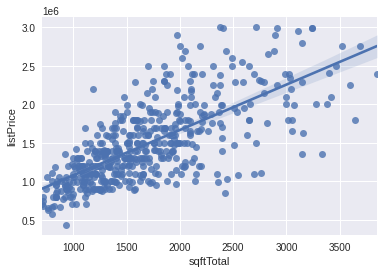

In [ ]:
sns.regplot("sqftTotal", "listPrice", df); #using SNS

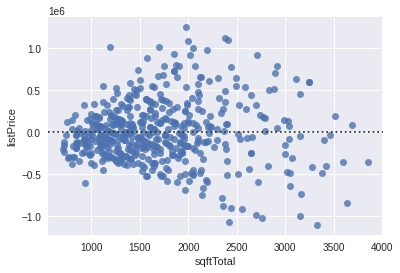

In [ ]:
sns.residplot("sqftTotal", "listPrice", df);

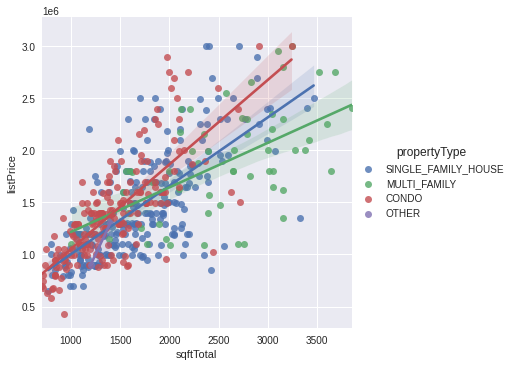

In [ ]:
sns.lmplot("sqftTotal", "listPrice", hue = 'propertyType', data = df);

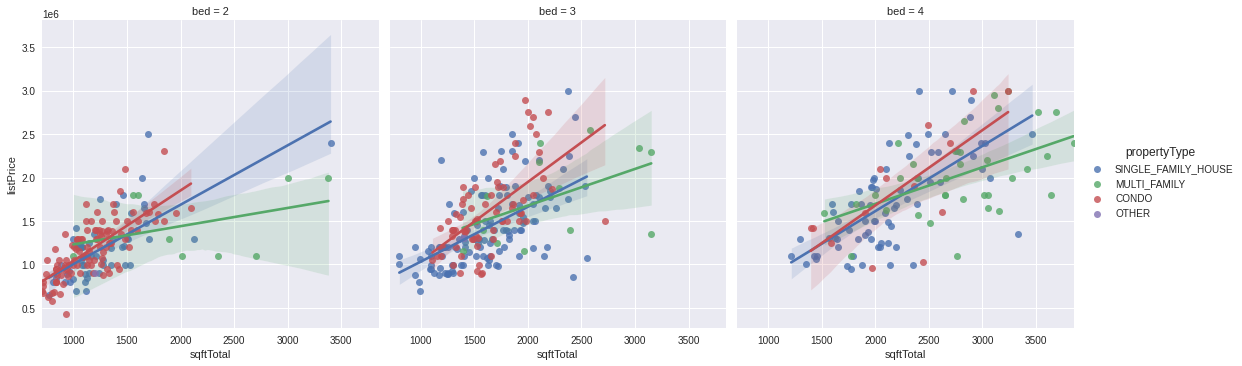

In [ ]:
sns.lmplot("sqftTotal", "listPrice", hue = 'propertyType', col = 'bed', data = df);

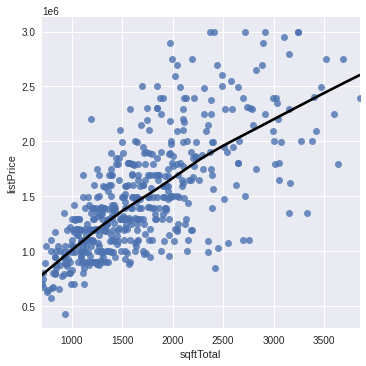

In [ ]:
sns.lmplot("sqftTotal", "listPrice", df, lowess=True, line_kws={"color": 'black'});

In [ ]:
df.columns

Index(['listPrice', 'lotSize', 'sqftTotal', 'bath', 'bed', 'propertyType',
       'zipCode', 'status', 'houseRealStatus'],
      dtype='object')

##Regression Model with one Predictor which has high correlation

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np


In [ ]:

#we can use R style formulas:
results = smf.ols('listPrice ~ sqftTotal', data=df).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              listPrice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     508.3
Date:                Thu, 13 May 2021   Prob (F-statistic):           2.87e-78
Time:                        05:25:30   Log-Likelihood:                -7166.2
No. Observations:                 504   AIC:                         1.434e+04
Df Residuals:                     502   BIC:                         1.434e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.855e+05   4.71e+04     10.309      0.0

##Linear regression

In [ ]:
X = pd.get_dummies(df, columns=categorical_col)

In [ ]:
y = X.pop('listPrice')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print('\n')
print('For Linear Regression Model, we got an accuracy of',(model.score(X_test,y_test)*100),'%')



For Linear Regression Model, we got an accuracy of 73.01027194683478 %


In [ ]:
Error = y_test - preds

(array([ 2.,  9., 19., 19., 20., 15.,  7.,  4.,  3.,  3.]),
 array([-545021.10779624, -399844.09566446, -254667.08353268,
        -109490.0714009 ,   35686.94073088,  180863.95286267,
         326040.96499445,  471217.97712623,  616394.98925801,
         761572.00138979,  906749.01352158]),
 <a list of 10 Patch objects>)

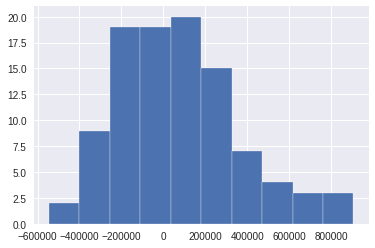

In [ ]:
plt.hist(Error) # Prediction - Actual should always follows normal distribution

##Ordinary Least Square method

In [ ]:
import statsmodels.api as sm # import statsmodels 

X = sm.add_constant(X) 

# Note the difference in argument order
model1 = sm.OLS(y_train, X_train).fit() 
predictions = model1.predict(X_test)

# Print out the statistics
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listPrice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     30.30
Date:                Thu, 13 May 2021   Prob (F-statistic):           2.48e-80
Time:                        05:25:31   Log-Likelihood:                -5611.8
No. Observations:                 403   AIC:                         1.128e+04
Df Residuals:                     373   BIC:                         1.140e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
lotSize                             -1.5122      9.766     -0.155      0.877     -20.715      17.691
sqftTotal                          459.9601     39.227     11.726      0.000     382.827     537.093
bath                              7.414e+04   2.14e+04      3.462      0.001     3.2e+04    1.16e+05
bed                               5.458e+04   2.69e+04      2.029      0.043    1683.722    1.07e+05
propertyType_CONDO                6.555e+04   4.95e+04      1.325      0.186   -3.18e+04    1.63e+05
propertyType_MULTI_FAMILY        -5.449e+04   6.44e+04     -0.846      0.398   -1.81e+05    7.21e+04
propertyType_OTHER                 3.31e+04   1.63e+05      0.203      0.839   -2.88e+05    3.54e+05
propertyType_SINGLE_FAMILY_HOUSE  2.669e+05   5.07e+04      5.259      0.000    1.67e+05    3.67e+05
zipCode_94102                     9.093e+04   2.71e+05      0.336      0.737   -4.42e+05    6.24e+05
zipCode_94103                    -1.434e+05   8.26e+04     -1.736      0.083   -3.06e+05     1.9e+04
zipCode_94105                    -1.511e+05   2.71e+05     -0.557      0.578   -6.85e+05    3.82e+05
zipCode_94107                     1.665e+05    7.1e+04      2.346      0.020    2.69e+04    3.06e+05
zipCode_94109                     2.685e+05   7.51e+04      3.576      0.000    1.21e+05    4.16e+05
zipCode_94110                      229.2183   4.31e+04      0.005      0.996   -8.45e+04     8.5e+04
zipCode_94112                    -4.028e+05   5.18e+04     -7.783      0.000   -5.05e+05   -3.01e+05
zipCode_94114                     2.904e+05   5.22e+04      5.568      0.000    1.88e+05    3.93e+05
zipCode_94115                     1.954e+05   7.35e+04      2.658      0.008    5.08e+04     3.4e+05
zipCode_94116                    -1.544e+05   6.74e+04     -2.292      0.022   -2.87e+05   -2.19e+04
zipCode_94117                     2.205e+05   5.79e+04      3.808      0.000    1.07e+05    3.34e+05
zipCode_94118                     2.048e+05   7.96e+04      2.571      0.011    4.82e+04    3.61e+05
zipCode_94121                     5.414e+04      7e+04      0.774      0.439   -8.34e+04    1.92e+05
zipCode_94122                    -1.905e+05   6.69e+04     -2.848      0.005   -3.22e+05    -5.9e+04
zipCode_94123                     5.105e+05   7.93e+04      6.439      0.000    3.55e+05    6.66e+05
zipCode_94124                    -5.335e+05   6.98e+04     -7.642      0.000   -6.71e+05   -3.96e+05
zipCode_94127                    -6.667e+04   7.52e+04     -0.887      0.376   -2.15e+05    8.12e+04
zipCode_94131                     8.069e+04   6.07e+04      1.330      0.184   -3.86e+04       2e+05
zipCode_94132                    -2.267e+05   8.67e+04     -2.613      0.009   -3.97e+05   -5.61e+04
zipCode_94133                     5.084e+05   1.05e+0

##Ridge Regression

In [ ]:
from sklearn import preprocessing
X = pd.get_dummies(df, columns=categorical_col)
y = X.pop('listPrice')
scaler = preprocessing.StandardScaler()
scaler.fit(X.iloc[:,:])
df_scaled=pd.DataFrame(scaler.transform(X.iloc[:,:]), columns=X.columns)
X = df_scaled #predictor variables



In [ ]:
from sklearn.linear_model import Ridge
from dmba import regressionSummary

R2 = Ridge(alpha=1.0)
R2.fit(X_train, y_train)

pred_ridge = R2.predict(X_test)
print('Training: Summary')
regressionSummary(y_train, R2.predict(X_train))

print('Testing: Summary')
regressionSummary(y_test, R2.predict(X_test))

print('\n')
print('For Ridge Regression Model, we got an accuracy of',(R2.score(X_test,y_test)*100),'%')

no display found. Using non-interactive Agg backend
Training: Summary

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 270673.4884
            Mean Absolute Error (MAE) : 204067.0455
          Mean Percentage Error (MPE) : -3.1843
Mean Absolute Percentage Error (MAPE) : 14.5119
Testing: Summary

Regression statistics

                      Mean Error (ME) : 74908.7851
       Root Mean Squared Error (RMSE) : 303914.2260
            Mean Absolute Error (MAE) : 227411.8727
          Mean Percentage Error (MPE) : 1.8969
Mean Absolute Percentage Error (MAPE) : 14.9403


For Ridge Regression Model, we got an accuracy of 72.81858045861628 %


#we got 72% accuracy which is good.  We can still improve the model with Decision tree, Ensemble Methods and Neural Network

In [ ]:
#running all models
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,Prediction =clf.fit(X_train,X_test,y_train,y_test)
print(models)


100%|██████████| 42/42 [00:04<00:00, 10.20it/s]

                                       Adjusted R-Squared  ...  Time Taken
Model                                                      ...            
PoissonRegressor                                     0.64  ...        0.02
SGDRegressor                                         0.59  ...        0.02
LinearRegression                                     0.59  ...        0.03
TransformedTargetRegressor                           0.59  ...        0.02
Lasso                                                0.59  ...        0.09
LassoLars                                            0.59  ...        0.07
Ridge                                                0.59  ...        0.02
LassoCV                                              0.59  ...        0.13
LassoLarsCV                                          0.59  ...        0.11
RidgeCV                                              0.59  ...        0.02
Lars                                                 0.59  ...        0.08
BayesianRidge            

In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.64,0.76,284865.44,0.02
SGDRegressor,0.59,0.73,302570.44,0.02
LinearRegression,0.59,0.73,302711.60,0.03
TransformedTargetRegressor,0.59,0.73,302711.60,0.02
Lasso,0.59,0.73,302841.24,0.09
LassoLars,0.59,0.73,302850.84,0.07
Ridge,0.59,0.73,302947.92,0.02
LassoCV,0.59,0.73,303440.60,0.13
LassoLarsCV,0.59,0.73,303716.67,0.11
